In [177]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']

In [178]:
sheet_url= "https://docs.google.com/spreadsheets/d/e/2PACX-1vSSyO7e4p5ucZayCdBvbAnYkLiWFRwIYz3F_MoOqZ3mKV9aNDSvzTMVTdNG3i7qXQrhYApTbn7OCDH7/pub?gid=951142289&single=true&output=csv"

In [179]:
df = pd.read_csv(sheet_url,nrows=6)

In [180]:
ratings_cols = [x for x in df.columns if x.startswith('How')]
df = df[ratings_cols]

In [181]:
books = [x.split('[')[-1].strip(']') for x in df.columns]
df.columns = books

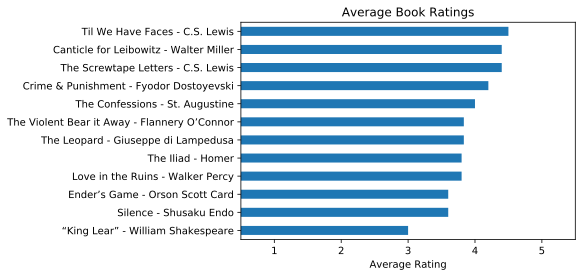

In [182]:
df.mean().sort_values().plot.barh()
plt.xlim(0.5,5.5)
plt.xlabel('Average Rating')
plt.ylabel(None)
plt.title('Average Book Ratings');

---

In [95]:
rating_dist = df.apply(pd.Series.value_counts).T
rating_dist.index.name = 'Book'
rating_dist = rating_dist.reset_index()
rating_dist['book_index'] = rating_dist.index.values

In [183]:
rating_dist

,Book,1.0,2.0,3.0,4.0,5.0,book_index
0,The Screwtape Letters - C.S. Lewis,NaN,NaN,1.0,1.0,3.0,0
1,Canticle for Leibowitz - Walter Miller,NaN,NaN,NaN,3.0,2.0,1
2,Silence - Shusaku Endo,NaN,NaN,2.0,3.0,NaN,2
3,Crime & Punishment - Fyodor Dostoyevski,NaN,NaN,1.0,2.0,2.0,3
4,Ender’s Game - Orson Scott Card,NaN,1.0,2.0,NaN,2.0,4
5,Love in the Ruins - Walker Percy,NaN,NaN,2.0,2.0,1.0,5
6,The Leopard - Giuseppe di Lampedusa,NaN,1.0,1.0,2.0,2.0,6
7,Til We Have Faces - C.S. Lewis,NaN,NaN,1.0,1.0,4.0,7
8,“King Lear” - William Shakespeare,1.0,1.0,1.0,3.0,NaN,8
9,The Iliad - Homer,NaN,NaN,1.0,4.0,NaN,9


In [184]:
long_ratings = rating_dist.melt(id_vars=['Book','book_index'])
long_ratings.columns = ['Book','book_index','Rating','# Votes']

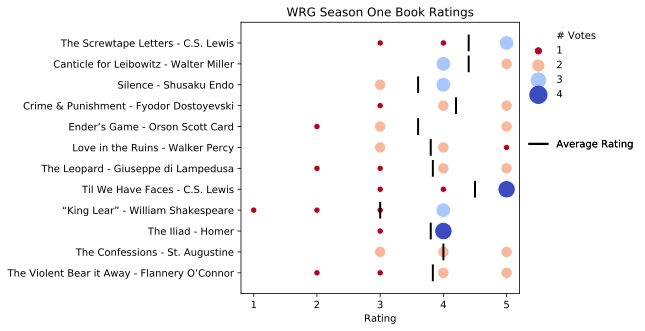

In [237]:
sns.scatterplot(data=long_ratings[['book_index','Rating','# Votes']].dropna().astype(int),x='Rating',y='book_index',size='# Votes',sizes=(40,300),hue='# Votes',palette='coolwarm_r',legend='brief')
plt.yticks(ticks=rating_dist.book_index, labels=rating_dist.Book.to_list())
plt.xticks(ticks=[1,2,3,4,5])
plt.gca().invert_yaxis()
plt.ylabel(None)
vote_legend = plt.legend(frameon=False,bbox_to_anchor=(1,1))
plt.gca().add_artist(vote_legend)

means = df.mean().values
ys = [x for x in range(len(means))]
ymins = [y-0.4 for y in ys]
ymaxs = [y+0.4 for y in ys]
vlines = plt.vlines(x=means,ymin=ymins,ymax=ymaxs,color='black',linewidth=2,label='Average Rating')
# stds = df.std().values
# xmins = [mean-std for mean, std in zip(means,stds)]
# xmaxs = [mean+std for mean, std in zip(means,stds)]
# plt.hlines(y=ys,xmin=xmins,xmax=xmaxs,color='black',linewidth=1,alpha=0.5)

avg_legend = plt.legend(handles=[vlines],frameon=False,bbox_to_anchor=(1,0.6))
plt.gca().add_artist(avg_legend)

plt.gcf().set_size_inches(5,5)
plt.title('WRG Season One Book Ratings')
plt.gcf().savefig('rating distributions.png',bbox_inches='tight',dpi=300)